<a href="https://colab.research.google.com/github/vigeecarolina/Machine_learning_kaggel_titanic/blob/https%2Fcolab.research.google.com%2Fdrive%2F1tar5LJfTbEtB87W6UGDXAN7KuS55GugR/TP4/ML3_TITANIC__Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Libraries

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('max.columns',100)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO DSC ML SUPERVISADO - Compartida 2/Notebooks/ML3 - Kaggle competition/titanic_train.csv')

In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ML Preprocessing (express)

* Data cleaning

In [ ]:
#Set index
df.set_index('PassengerId', inplace=True)

In [ ]:
#
categories = list(df.select_dtypes(include='object').columns)

In [ ]:
pd.set_option('max.rows',20)

In [ ]:
for i in categories:
  print(i)
  print('Unique:',df[i].nunique())
  print(df[i].value_counts(),'\n')

Name
Unique: 891
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

Sex
Unique: 2
male      577
female    314
Name: Sex, dtype: int64 

Ticket
Unique: 681
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

Cabin
Unique: 147
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1


In [ ]:
# Drop variables que favorecen el overfitting (falta de generalización) como el nombre o el numero de ticket
df.drop(columns=['Name','Ticket'], inplace=True)

In [ ]:
# Nos quedamos solo con la letra de la cabina
df['Cabin_char'] = df['Cabin'].str[0]
df.drop(columns='Cabin', inplace=True)

* Remove nulls

In [ ]:
df.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Cabin_char    687
dtype: int64

In [ ]:
print('Age (mean):',df['Age'].mean())

Age (mean): 29.69911764705882


In [ ]:
print('Embarked (mode)',df['Embarked'].mode())

Embarked (mode) 0    S
dtype: object


In [ ]:
df['Age'] = df['Age'].fillna(30)                      # imputamos media en Edad
df['Embarked'] = df['Embarked'].fillna('S')          # imputamos moda en Embarked
df['Cabin_char'] = df['Cabin_char'].fillna('NONE')   # imputamos valor arbitrario en letra cabina

In [ ]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Cabin_char  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [ ]:
df_pred['Age'] = df_pred['Age'].astype('int')

* One Hot Encoder

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G,Cabin_char_NONE,Cabin_char_T
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
del df["Sex_male"]

# Split X-y

In [ ]:
target = 'Survived'
features = df.columns[df.columns != target]

In [ ]:
y = df[target]
X = df[features]

**---------------------------------------------------------------------<br>
A partir de aqui el ejercicio esta por completar. Aplica lo visto en anteriores ejercicios para completar los siguientes pasos y ganar la competición <br>    ---------------------------------------------------------------------**

# Target distribution

In [ ]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

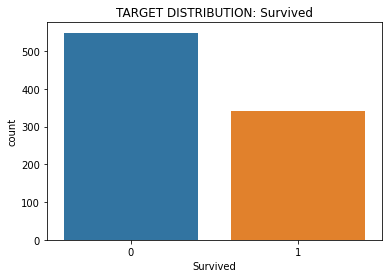

In [ ]:
sns.countplot(y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
X_train = X
y_train = y

# Rescaling

Estandarizamos en el train data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# TRAIN MODEL

## Model competition

Prueba distintos modelos y mide su performance con Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

In [ ]:
#AUC
auc_train = roc_auc_score(y_train, y_train_pred_proba)

In [ ]:
print('AUC Train:', round(auc_train,4))

AUC Train: 0.9426


In [ ]:
# Funcion que devuelve un dataframe con resultados de RMSE Cross Validation
def AUC(model,X,y):
  return roc_auc_score(y,model.predict_proba(X)[:,1])

def cross_validation(model,X,y):
  Kfold_metric = cross_val_score(model, X, y, cv=4, scoring='roc_auc')
  return Kfold_metric.mean()

# Inicializa resultados
label_ = []
metric_train_ = []
metric_valida_ = []

def evaluate_model(label, model, X, y):
  model.fit(X,y)
  metric_train = AUC(model,X,y)
  metric_valida = cross_validation(model,X,y)

  label_.append(label)
  metric_train_.append(metric_train)
  metric_valida_.append(metric_valida)
  return pd.DataFrame({'Model': label_,
                      'AUC Train': metric_train_,
                      'AUC Cross-Valida': metric_valida_
                      }).sort_values('AUC Cross-Valida')

In [ ]:
from sklearn.linear_model import LogisticRegression
evaluate_model(label='Logistic Regression',
               model=LogisticRegression(),
               X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.864341,0.84851


In [ ]:
evaluate_model(label='GBC',
                    model = GradientBoostingClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.864341,0.848510
1,GBC,0.942626,0.869869


In [ ]:
cross_validation(model,X,y)

0.8704968424676595

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
roc_auc_score(y,model.predict_proba(X)[:,1])

0.674708933840369

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = LogisticRegression

In [ ]:
evaluate_model(label='LG',
                    model = LogisticRegression(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.864341,0.848510
2,LG,0.864341,0.848510
1,GBC,0.942626,0.869869


In [ ]:
from sklearn.svm import SVC
evaluate_model(label='SVC',
                    model = SVC(probability=True),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.864341,0.848510
2,LG,0.864341,0.848510
3,SVC,0.880666,0.857488
1,GBC,0.942626,0.869869


In [ ]:
model = LinearSVC

In [ ]:
model = RandomForestClassifier

In [ ]:
evaluate_model(label='RF',
                    model = RandomForestClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.864341,0.848510
2,LG,0.864341,0.848510
4,RF,0.997241,0.856859
3,SVC,0.880666,0.857488
1,GBC,0.942626,0.869869


In [ ]:
model = xgb

In [ ]:
evaluate_model(label='XGBoost',
                    model = xgb.XGBClassifier(objective ='reg:squarederror'),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.864341,0.848510
2,LG,0.864341,0.848510
4,RF,0.997241,0.856859
3,SVC,0.880666,0.857488
1,GBC,0.942626,0.869869
5,XGBoost,0.936485,0.871201


In [ ]:
model = KNeighborsClassifier

In [ ]:
evaluate_model(label='knn',
                    model = KNeighborsClassifier(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
6,knn,0.923250,0.836989
0,Logistic Regression,0.864341,0.848510
2,LG,0.864341,0.848510
4,RF,0.997241,0.856859
3,SVC,0.880666,0.857488
1,GBC,0.942626,0.869869
5,XGBoost,0.936485,0.871201


In [ ]:
#HIPERPARAMETRIZACION

In [ ]:
parameters_hp = {
    'learning_rate': [0.0001, 0.01,0.1,0.5],
    'min_samples_leaf': [2,3,4,5],
    'max_depth': [2,4,5,6,8],
    'max_leaf_nodes': [4,6,8,10]
}

In [ ]:
search_hp = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                               param_distributions = parameters_hp,
                               scoring='roc_auc',     # metrica a optimizar: RMSE
                               cv = 5,                                    # numero de folds para cross-validation
                               n_iter = 50,                               # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1,
                               verbose=True)

In [ ]:
search_hp.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.01, 0.1,
                                                          0.5],
                                        'max_depth': [2, 4, 5, 6, 8],
                                        'max_leaf_nodes': [4, 6, 8, 10],
                                        'min_samples_leaf': [2, 3, 4, 5]},
                   scoring='roc_auc', verbose=True)

In [ ]:
    print("---- Results from Random Search -----" )
    print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
    print("\n The best AUC:", search_hp.best_score_)
    print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: GradientBoostingClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=2,
                           random_state=42)

 The best AUC: 0.8760372063391841

 The best parameters across ALL searched params:
 {'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_depth': 6, 'learning_rate': 0.1}


## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso.

In [ ]:
model = search_hp.best_estimator_

# TEST PREDICTIONS

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
df_pred = pd.read_csv("/content/drive/MyDrive/NUCLIO DSC ML SUPERVISADO - Compartida 2/Notebooks/ML3 - Kaggle competition/titanic_test.csv")

## ML Preprocessing

Al igual que en el preprocessing inicial, repetimos:
* Drop de columnas
* Imputación de nulos (mismos valores)
* One Hot Encoding

In [ ]:
df_pred.set_index('PassengerId', inplace=True)

In [ ]:
categories = list(df.select_dtypes(include='object').columns)

In [ ]:
pd.set_option('max.rows',20)

In [ ]:
for i in categories:
  print(i)
  print('Unique:',df[i].nunique())
  print(df[i].value_counts(),'\n')

In [ ]:
df_pred.drop(columns=['Name','Ticket'], inplace=True)

In [ ]:
df_pred['Cabin_char'] = df_pred['Cabin'].str[0]
df_pred.drop(columns='Cabin', inplace=True)

In [ ]:
df.isna().sum()

Survived           0
Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Sex_female         0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Cabin_char_A       0
Cabin_char_B       0
Cabin_char_C       0
Cabin_char_D       0
Cabin_char_E       0
Cabin_char_F       0
Cabin_char_G       0
Cabin_char_NONE    0
Cabin_char_T       0
dtype: int64

In [ ]:
df_pred['Age'] = df_pred['Age'].fillna(30)                      # imputamos media en Edad
df_pred['Embarked'] =df_pred['Embarked'].fillna('S')          # imputamos moda en Embarked
df_pred['Cabin_char'] = df_pred['Cabin_char'].fillna('NONE')
df_pred['Fare'] = df_pred['Fare'].fillna(32)

In [ ]:
df_pred['Age'] = df_pred['Age'].astype('int')

In [ ]:
df_pred = pd.get_dummies(df_pred)

In [ ]:
del df_pred['Sex_male']

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   Age              418 non-null    int64  
 2   SibSp            418 non-null    int64  
 3   Parch            418 non-null    int64  
 4   Fare             418 non-null    float64
 5   Sex_female       418 non-null    uint8  
 6   Embarked_C       418 non-null    uint8  
 7   Embarked_Q       418 non-null    uint8  
 8   Embarked_S       418 non-null    uint8  
 9   Cabin_char_A     418 non-null    uint8  
 10  Cabin_char_B     418 non-null    uint8  
 11  Cabin_char_C     418 non-null    uint8  
 12  Cabin_char_D     418 non-null    uint8  
 13  Cabin_char_E     418 non-null    uint8  
 14  Cabin_char_F     418 non-null    uint8  
 15  Cabin_char_G     418 non-null    uint8  
 16  Cabin_char_NONE  418 non-null    uint8  
dtypes: float64(1)

In [ ]:
df_pred['Cabin_char_T'] = 0
X_test = scaler.transform(df_pred)

## Predictions

In [ ]:
y_test=model.predict(X_test)

In [ ]:
df_predictions=pd.DataFrame({'PassengerId':df_pred.index.values,
                             'Survived':y_test})

In [ ]:
df_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_predictions.to_csv("/content/drive/MyDrive/NUCLIO DSC ML SUPERVISADO - Compartida 2/Notebooks/ML3 - Kaggle competition/predictionfinal.csv", index= False)

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.